# <center>Лабораторная работа 7</center>

##### Васютинский В.А.
##### М8О-408Б-20

Решить краевую задачу для дифференциального уравнения эллиптического типа. Аппроксимацию уравнения произвести с использованием центрально-разностной схемы. Для решения дискретного аналога применить следующие методы: метод простых итераций (метод Либмана), метод Зейделя, метод простых итераций с верхней релаксацией. Вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением  $U(x, y)$. Исследовать зависимость погрешности от сеточных параметров  $h_x, h_y$.

Вариант 5:

(dU)^2 / (dx)^2 + (dU)^2/(dy)^2 = -2U

U(0, y) = cos(y)

U(Pi/2, y) = 0

U(x, 0) = cos(x)

U(x, Pi/2) = 0

Аналитическое решение:

U(x, y) = cos(x) * cos(y)

## <center> Конечно-разностная схема </center>
<h3><center> Общая концепция </center></h3>
Будем решать задачу на заданном промежутке  от $0$ до $l_x$ по координате $x$ и на промежутке от $0$ до $l_y$ по координате $y$.

Рассмотрим конечно-разностную схему решения краевой задачи на сетке с граничными парамерами $l_x$, $l_y$ и параметрами насыщенности сетки $N_x$, $N_y$. Тогда размер шага по каждой из координат определяется:
$$h_x = \displaystyle\frac{l_x}{N_x - 1}, \; h_y = \displaystyle\frac{N_y}{N_y - 1}$$

Попробуем определить связь между дискретными значениями функции путем разностной апроксимации производной:

$$\displaystyle\frac{\partial^2 u}{\partial x^2}(x_j, y_i) + \displaystyle\frac{\partial^2 u}{\partial y^2}(x_j, y_i) = \displaystyle\frac{u_{j-1, i} - 2u_{j, i} + u_{j+1, i}}{h_x^2} + \displaystyle\frac{u_{j, i-1} - 2u_{j, i} + u_{j, i+1}}{h_y^2}$$

Тогда выражая из искомого уравнения значение
$u_{i, j} = \displaystyle\frac{h^2_y (u_{j-1, i} + u_{j+1, i}) + h^2_x (u_{j, i-1} + u_{j, i+1})}{2(h^2_x + h^2_y)}$, мы получаем основу для применения иттерационных методов решения *СЛАУ*.

Для расчета $u_{j, 0}$ и $u_{0, i}$ следует использовать граничные условия.
<center><h3> Начальная инициализация </h3></center>
Поскольку в нашем варианте известны граничные значения $u(x, l_{y0})$ и $u(x, l_{y1})$, то для начальной инициаизации значений в сетке можно использовать линейную интерполяцию при фиксированном $x = x_j$ для улучшения сходимости:

$$u_{j, i} = \frac{u(x_j, l_{y1}) - u(x_j, l_{y0})}{l_{y1} - l_{y0}} \cdot (y_i - l_{y0}) + u(x_j, l_{y0})$$
<center><h3> Граничные значения </h3></center>
Для границ по $y$ координате значения заданы явно граничным условием, и мы можем определить их на начальном этапе при инициализации.

Для границ по $x$ координате аппроксимируем значение производной из граничного условия с помощью трёхточечной аппроксимации в точках $x = 0$ и $x = l$ и получаем 2 новых уравнения в *СЛАУ* соответственно:

$$\displaystyle\frac{-3u_{0, i} + 4u_{1, i} - u_{2, i}}{2h_x} = \phi_0(y_i)$$

$$\displaystyle\frac{3u_{N, i} - 4u_{N-1, i} + u_{N-2, i}}{2h_x} = \phi_1(y_i)$$

Тогда основа для иттерационного метода:

$$u_{0, i} = \displaystyle\frac{-2h_x \phi_0(y_i) + 4u_{1, i} - u_{2, i}}{3}$$

$$u_{N, i} = \displaystyle\frac{2h_x \phi_1(y_i) + 4u_{N-1, i} - u_{N-2, i}}{3}$$
<center><h3> Методы решения СЛАУ </h3></center>
Для решения СЛАУ можно воспользоваться иттерационными методами, такими как *метод простых иттераций, метод Зейделя* и *метод верхних релаксаций*. Первые два метода были изучены нами ранее, когда как последний является небольшой модификацией *метода Зейделя* с добавлением параметра *w*, который позволяет регулировать скорость сходимости метода.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def U0y(y: float):
    return np.cos(y)

def Ux0(x: float):
    return np.cos(x)

def Uly(y: float):
    return 0

def Uxl(x: float):
    return 0

def f(x:float, y:float):
    return 0

def Uans(x:float, y:float):
    return np.cos(x)*np.cos(y)

с = -2
startx = 0
starty = 0
finishx = np.pi / 2 
finishy = np.pi / 2 
kx = 20
ky = 20
hx = (finishx - startx) / (kx - 1)
hy = (finishy - starty) / (ky - 1)
xs = np.linspace(startx, finishx, kx)
ys = np.linspace(starty, finishy, ky)
xgrid, ygrid = np.meshgrid(xs, ys)
zans = np.zeros((kx, ky), dtype=np.float64)
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        zans[i][j] = Uans(x,y)

In [3]:
answer_lib = np.zeros((kx, ky), dtype=np.float64)
cur_step = np.zeros((kx, ky), dtype=np.float64)

for i, y in enumerate(ys):
    cur_step[0][i] = U0y(y)
    cur_step[-1][i] = Uly(y)
for i, x in enumerate(xs):
    cur_step[i][0] = Ux0(x)
    cur_step[i][-1] = Uxl(x)

for i in range(1, kx - 1):
    coef = (cur_step[i][-1] - cur_step[i][0]) / (ys[-1] - ys[0])
    for j in range(1, ky - 1):
        cur_step[i][j] = cur_step[i][0] + coef*(ys[j] - ys[0])
        
next_step = np.array(cur_step, copy=True)

In [4]:
def get_error(cur_step, next_step):
    return np.max(np.abs(next_step - cur_step))

Conut iterations: 507


Text(0.5, 0, 'x')

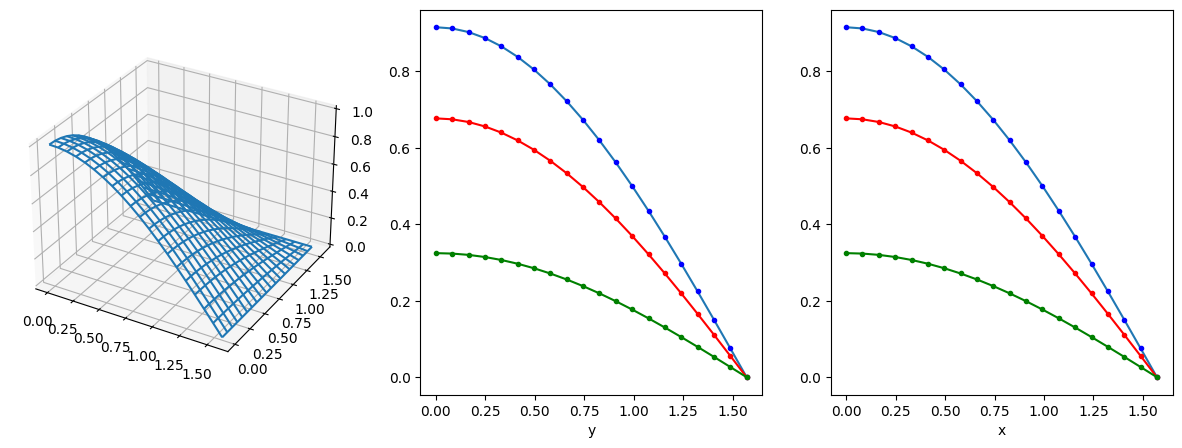

In [5]:
error = 1 * 10**(-5)
count = 0
while True:
    cur_step = np.array(next_step)
    for i in range(1, kx - 1):
        for j in range(1, ky - 1):
            next_step[i][j] = (
                hx**2 * cur_step[i+1][j]
                + hx**2 * cur_step[i-1][j]
                + hy**2 * cur_step[i][j+1]
                + hy**2 * cur_step[i][j-1]
                - f(xs[i], ys[j]) * hx**2 * hy**2
            ) / (2 * (hx**2 + hy**2) + hx**2 * hy**2 * с)
    count += 1
    if get_error(cur_step, next_step) < error:
        break
    
print("Conut iterations: {iterations}".format(iterations = count))
    
answer_lib = np.array(next_step)

plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax_3d = fig.add_subplot(1,3,1, projection='3d')
ax_3d.plot_wireframe(xgrid, ygrid, answer_lib.transpose())
axx = fig.add_subplot(1,3,2)
axx.plot(ys, answer_lib[kx // 4])
axx.plot(ys, zans[kx // 4], '.b')
axx.plot(ys, answer_lib[kx // 4 * 2], 'r')
axx.plot(ys, zans[kx // 4 * 2], '.r')
axx.plot(ys, answer_lib[kx // 4 * 3], 'g')
axx.plot(ys, zans[kx // 4 * 3], '.g')
plt.xlabel('y')
axy = fig.add_subplot(1,3,3)
axy.plot(xs, answer_lib[:, ky // 4])
axy.plot(xs, zans[:, ky // 4], '.b')
axy.plot(xs, answer_lib[:, ky // 4 * 2], 'r')
axy.plot(xs, zans[:, ky // 4 * 2], '.r')
axy.plot(xs, answer_lib[:, ky // 4 * 3], 'g')
axy.plot(xs, zans[:, ky // 4 * 3], '.g')
plt.xlabel('x')

Text(0.5, 0, 'x')

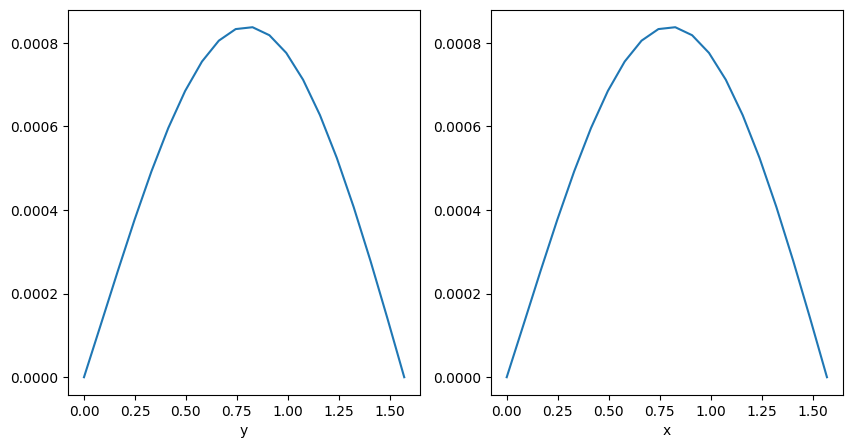

In [6]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot (1, 2, 1)
plt.plot(ys, np.max(np.abs(answer_lib - zans), axis=0))
plt.xlabel('y')
plt.subplot (1, 2, 2)
plt.plot(xs, np.max(np.abs(answer_lib - zans), axis=1))
plt.xlabel('x')

### Итерационный метод с релаксацией


In [7]:
answer_relax = np.zeros((kx, ky), dtype=np.float64)
relax_coef = 0.5
cur_step = np.zeros((kx, ky), dtype=np.float64)

for i, y in enumerate(ys):
    cur_step[0][i] = U0y(y)
    cur_step[-1][i] = Uly(y)
for i, x in enumerate(xs):
    cur_step[i][0] = Ux0(x)
    cur_step[i][-1] = Uxl(x)

for i in range(1, kx - 1):
    coef = (cur_step[i][-1] - cur_step[i][0]) / (ys[-1] - ys[0])
    for j in range(1, ky - 1):
        cur_step[i][j] = cur_step[i][0] + coef*(ys[j] - ys[0])
        
next_step = np.array(cur_step, copy=True)

Conut iterations: 1015


Text(0.5, 0, 'x')

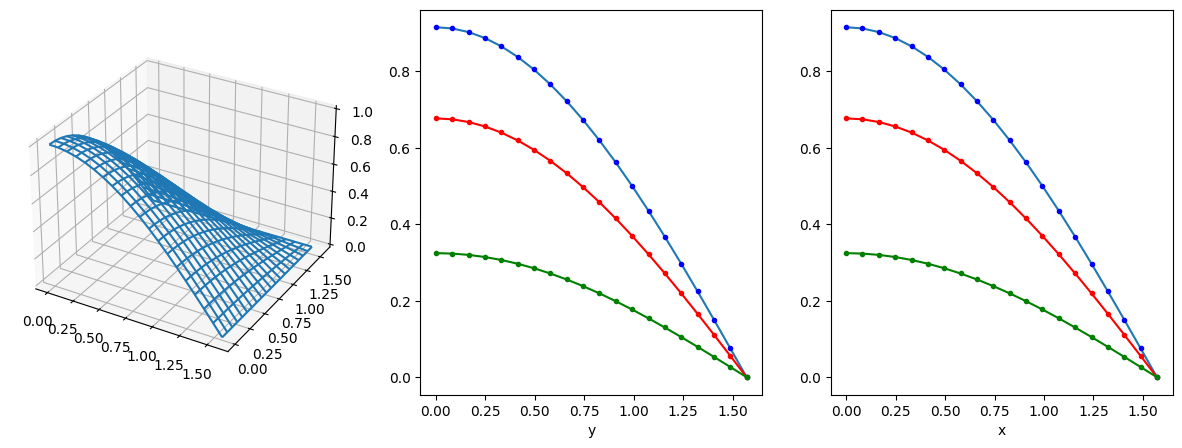

In [8]:
error = 1 * 10**(-5)
count = 0
while True:
    cur_step = np.array(next_step)*relax_coef + (1 - relax_coef)*cur_step
    for i in range(1, kx - 1):
        for j in range(1, ky - 1):
            next_step[i][j] = (
                hx**2 * cur_step[i+1][j]
                + hx**2 * cur_step[i-1][j]
                + hy**2 * cur_step[i][j+1]
                + hy**2 * cur_step[i][j-1]
                - f(xs[i], ys[j]) * hx**2 * hy**2
            ) / (2 * (hx**2 + hy**2) + hx**2 * hy**2 * с)
    count += 1
    if get_error(cur_step, next_step) < error:
        break

print("Conut iterations: {iterations}".format(iterations = count))

answer_relax = np.array(next_step)

plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax_3d = fig.add_subplot(1,3,1, projection='3d')
ax_3d.plot_wireframe(xgrid, ygrid, answer_relax.transpose())
axx = fig.add_subplot(1,3,2)
axx.plot(ys, answer_relax[kx // 4])
axx.plot(ys, zans[kx // 4], '.b')
axx.plot(ys, answer_relax[kx // 4 * 2], 'r')
axx.plot(ys, zans[kx // 4 * 2], '.r')
axx.plot(ys, answer_relax[kx // 4 * 3], 'g')
axx.plot(ys, zans[kx // 4 * 3], '.g')
plt.xlabel('y')
axy = fig.add_subplot(1,3,3)
axy.plot(xs, answer_relax[:, ky // 4])
axy.plot(xs, zans[:, ky // 4], '.b')
axy.plot(xs, answer_relax[:, ky // 4 * 2], 'r')
axy.plot(xs, zans[:, ky // 4 * 2], '.r')
axy.plot(xs, answer_relax[:, ky // 4 * 3], 'g')
axy.plot(xs, zans[:, ky // 4 * 3], '.g')
plt.xlabel('x')

Text(0.5, 0, 'x')

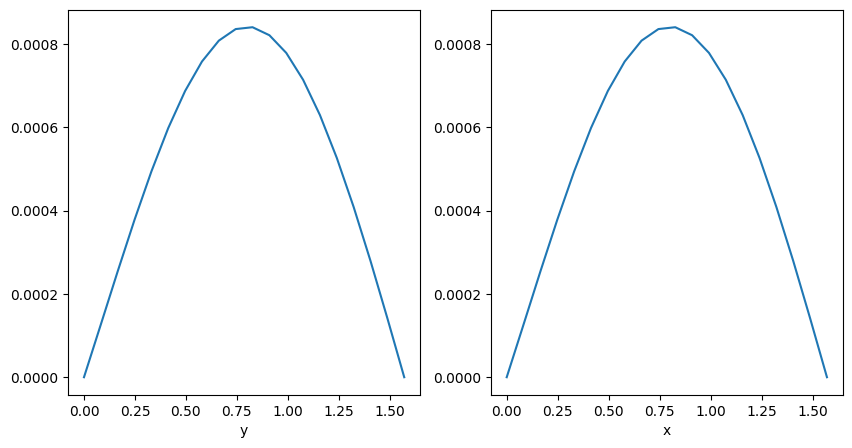

In [9]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot (1, 2, 1)
plt.plot(ys, np.max(np.abs(answer_relax - zans), axis=0))
plt.xlabel('y')
plt.subplot (1, 2, 2)
plt.plot(xs, np.max(np.abs(answer_relax - zans), axis=1))
plt.xlabel('x')

### Метод Зейделя


In [10]:
answer_zeydel = np.zeros((kx, ky), dtype=np.float64)
cur_step = np.zeros((kx, ky), dtype=np.float64)

for i, y in enumerate(ys):
    cur_step[0][i] = U0y(y)
    cur_step[-1][i] = Uly(y)
for i, x in enumerate(xs):
    cur_step[i][0] = Ux0(x)
    cur_step[i][-1] = Uxl(x)

for i in range(1, kx - 1):
    coef = (cur_step[i][-1] - cur_step[i][0]) / (ys[-1] - ys[0])
    for j in range(1, ky - 1):
        cur_step[i][j] = cur_step[i][0] + coef*(ys[j] - ys[0])
        
next_step = np.array(cur_step, copy=True)

Conut iterations: 285


Text(0.5, 0, 'x')

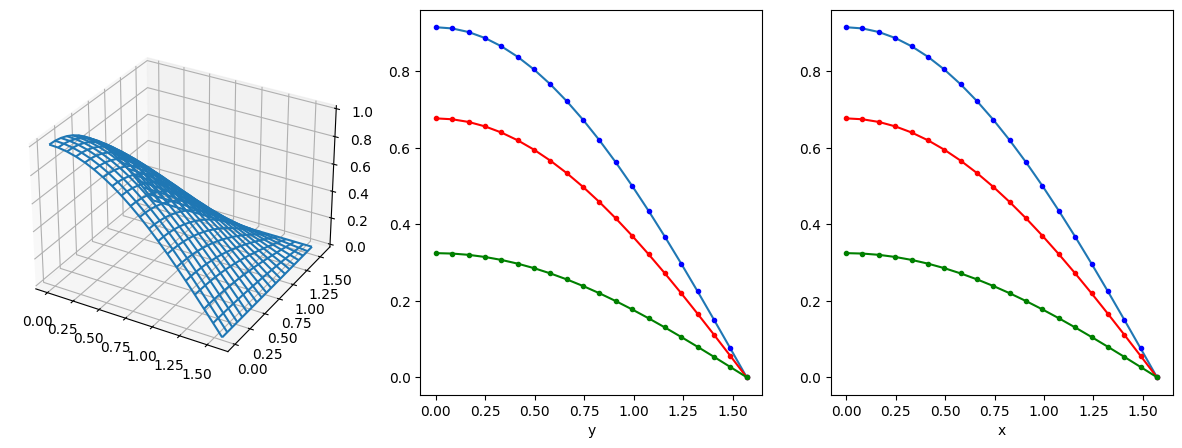

In [11]:
error = 1 * 10**(-5)
count = 0
while True:
    cur_step = np.array(next_step)
    for i in range(1, kx - 1):
        for j in range(1, ky - 1):
            next_step[i][j] = (
                hx**2 * cur_step[i+1][j]
                + hx**2 * next_step[i-1][j]
                + hy**2 * cur_step[i][j+1]
                + hy**2 * next_step[i][j-1]
                - f(xs[i], ys[j]) * hx**2 * hy**2
            ) / (2 * (hx**2 + hy**2) + hx**2 * hy**2 * с)
    count += 1
    if get_error(cur_step, next_step) < error:
        break

print("Conut iterations: {iterations}".format(iterations = count))

answer_zeydel = np.array(next_step)

plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax_3d = fig.add_subplot(1,3,1, projection='3d')
ax_3d.plot_wireframe(xgrid, ygrid, answer_zeydel.transpose())
axx = fig.add_subplot(1,3,2)
axx.plot(ys, answer_zeydel[kx // 4])
axx.plot(ys, zans[kx // 4], '.b')
axx.plot(ys, answer_zeydel[kx // 4 * 2], 'r')
axx.plot(ys, zans[kx // 4 * 2], '.r')
axx.plot(ys, answer_zeydel[kx // 4 * 3], 'g')
axx.plot(ys, zans[kx // 4 * 3], '.g')
plt.xlabel('y')
axy = fig.add_subplot(1,3,3)
axy.plot(xs, answer_zeydel[:, ky // 4])
axy.plot(xs, zans[:, ky // 4], '.b')
axy.plot(xs, answer_zeydel[:, ky // 4 * 2], 'r')
axy.plot(xs, zans[:, ky // 4 * 2], '.r')
axy.plot(xs, answer_zeydel[:, ky // 4 * 3], 'g')
axy.plot(xs, zans[:, ky // 4 * 3], '.g')
plt.xlabel('x')

Text(0.5, 0, 'x')

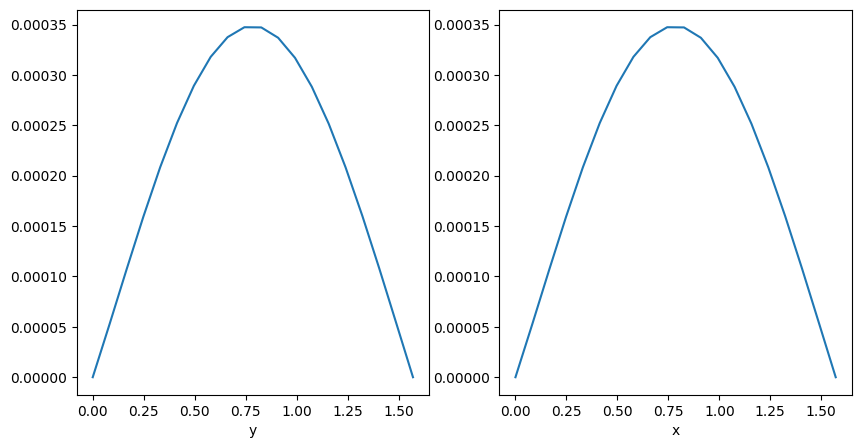

In [12]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot (1, 2, 1)
plt.plot(ys, np.max(np.abs(answer_zeydel - zans), axis=0))
plt.xlabel('y')
plt.subplot (1, 2, 2)
plt.plot(xs, np.max(np.abs(answer_zeydel - zans), axis=1))
plt.xlabel('x')